Task 2: Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022 Scenario: The Warehouse Team has observed a surplus in the stock of "Others" category products at the end of 2022. They would like to know if sales have declined in 2022 compared to 2021. Additionally, they want to see the 20 products that experienced the largest decrease in sales. Requirements: 1. Create two datasets: o One for sales data in 2021 (qty_ordered for "Others" category). o One for sales data in 2022 (qty_ordered for "Others" category). 2. Merge the datasets and calculate the sales difference between 2022 and 2021. 3. Calculate the percentage change in sales and classify it as "DOWN", "UP", or "FAIR". 4. Sort the products by the largest decrease in sales and show the top 20 products. 5. Create a horizontal bar chart to display the products with the largest decrease in sales between 2022 and 2021. Key Features to Use: • category • order_date (for filtering by year) • is_valid • sku_name • qty_ordered

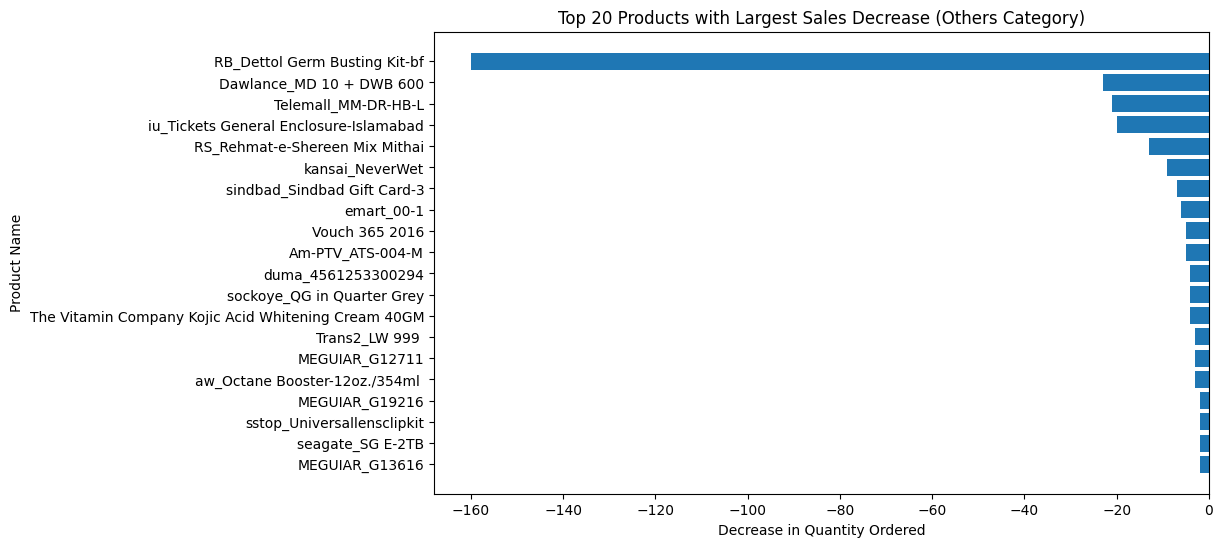

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")

df['order_date'] = pd.to_datetime(df['order_date'])
others_df = df[(df['category'] == 'Others') & (df['is_valid'] == 1)]
sales_2021 = others_df[others_df['order_date'].dt.year == 2021].groupby('sku_name', as_index=False)['qty_ordered'].sum()
sales_2022 = others_df[others_df['order_date'].dt.year == 2022].groupby('sku_name', as_index=False)['qty_ordered'].sum()

sales_2021.rename(columns={'qty_ordered': 'qty_2021'}, inplace=True)
sales_2022.rename(columns={'qty_ordered': 'qty_2022'}, inplace=True)

merged = pd.merge(sales_2021, sales_2022, on='sku_name', how='outer').fillna(0)
merged['difference'] = merged['qty_2022'] - merged['qty_2021']
merged['pct_change'] = ((merged['qty_2022'] - merged['qty_2021']) / merged['qty_2021'].replace(0, 1)) * 100

def classify(change):
    if change < -10:
        return 'DOWN'
    elif change > 10:
        return 'UP'
    else:
        return 'FAIR'

merged['trend'] = merged['pct_change'].apply(classify)

top20_decrease = merged.sort_values(by='difference', ascending=True).head(20)


plt.figure(figsize=(10,6))
plt.barh(top20_decrease['sku_name'], top20_decrease['difference'])
plt.xlabel('Decrease in Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 20 Products with Largest Sales Decrease (Others Category)')
plt.gca().invert_yaxis()
plt.show()
